# Playing with The Shooting Method
---

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Playing with odes

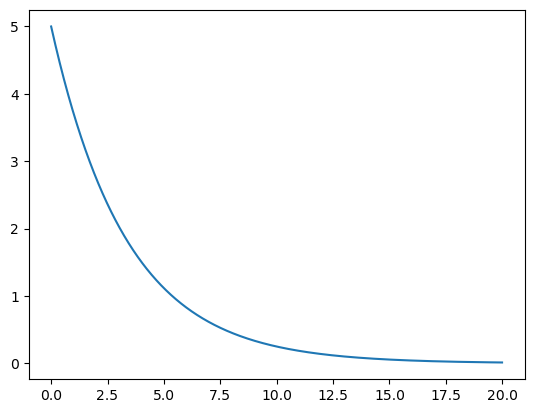

In [2]:
## solving ordinary second order ode
y0 = 5

def spring(x, t, k):
    dyydt = -k * x
    return dyydt

k = 0.3
t = np.arange(0, 20, 0.01)
sol = odeint(spring, y0, t, args=(k,))
plt.plot(t, sol)

For the next part, we are trying to solve the second order ODE <br>
$$y'' + y' + 2y = 0$$
We take this and transform it into 2 different ODEs by variable subsitution. We
define $x_2(t) = y'(t)$, and $x_1(t) = y(t)$, then we will have $x_1' = y' =
x_2$ and $x_2' = y'' = Ax_1 - Bx_2$. <br>

Overall then, these substitutions leave us with the system of equations <br>
\begin{align*}
x_1' &= x_2 \\
x_2' &= Ax_1 - Bx_2
\end{align*}

In [3]:
# we ignore t here because it is fed via the odeint() function
# we use Y[1] and Y[0] do differentiate between the two functions we've created,
# this will solve the 2nd order ode with odeint
def solvr(Y, t):
    return [Y[1], -2 * Y[0] - Y[1]]

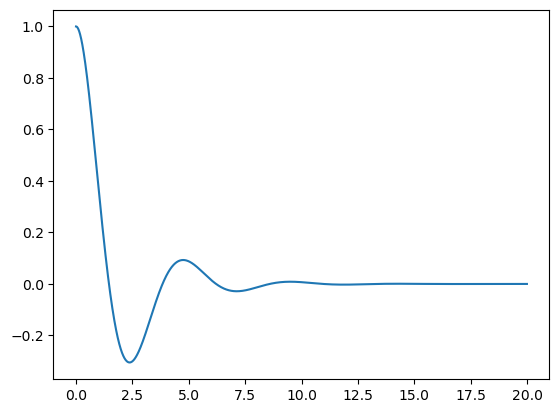

In [4]:
sol_2 = odeint(solvr, [1, 0], t)
plt.plot(t, sol_2[:,0])

Okay now I want to try and get solutions to the spring equation, or Hooke's law
<br>
$$ m x'' = -k x$$

So we will use the change of variables $y_1 = x$, and $y_2 = x'$. I will also
exclude m from the calculations for now, though later I hope to add it back as a
secondary parameter in the odeint args functionality. <br>

We can note, there is no $y_1$ for this system, I think this general form should
still work, though. We should have <br>
\begin{align*}
    y_1' &= y_2 \\
    y_2' &= -k y_1
\end{align*}

In [5]:
def spring2(x, t):
    k = 0.3
    return [x[1], -k * x[0]]

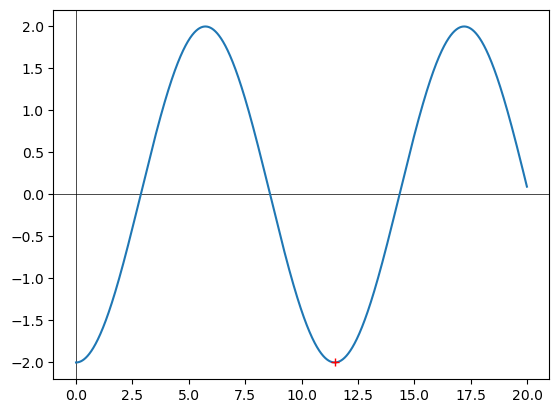

In [6]:
sol_3 = odeint(spring2, [-2, 0], t)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.plot(t, sol_3[:,0])
plt.plot(11.471, -2, 'r+')  # plot a known value for the solution to Hooke's law for this system

Cool! We can see reasonable agreement, so we've solved 2nd order ODE in python
(something that I could have done in 2 seconds in mathematica, but _whatever ig_)

Alright, now we want to get the TISE solved sooo <br>

$$
    \frac{-\hbar^2}{2m}\frac{\partial^2 \psi}{\partial x^2} = (E-V)\psi
$$

We are gonna take $\frac{\hbar^2}{m} = 1$ which will not only simplify our
expression, but also our units. Now <br>

\begin{align*}
    \gamma_1' &= \gamma_2 \\
    \gamma_2' &= 2(E-V)\gamma_1
\end{align*}

In [7]:
a = 1   # well width
v0 = 50   # potential energy

# here we take psi as the function in, and x is out iterator of "time step" 
# (though we are moving over x now and not t)
def solv_se(psi, x):
    e = 3.41357                                 # set energy
    v = 0 if np.abs(x) < a/2 else v0            # set v to be zero within the well, 100 outside it
    return [psi[1], -2 * (e - v) * psi[0]]      # return values with the solved ode (full disclosure, not sure how this part works)

(-2.0, 4.0)

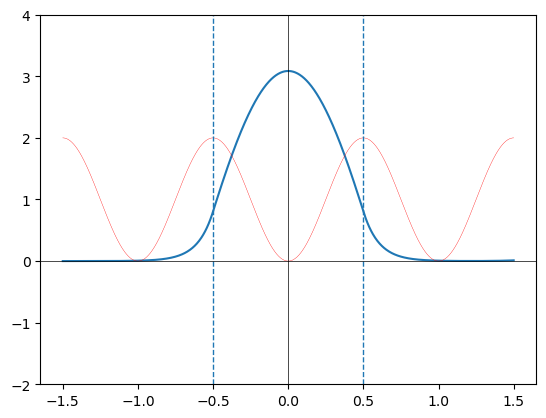

In [8]:
x = np.linspace(-1.5, 1.5, 1000)                     # the range we wish to plot over

sol_se = odeint(solv_se, [0, 0.001], x)              # solve the ode

# plotting
plt.plot(x, (sol_se[:,0]))
plt.plot(x, (np.sqrt(2/a) * np.sin(np.pi * x / a))**2, color='red', linewidth=0.25) # this is the actual solution (supposedly)

# lines for the well
plt.axvline(x=a/2, ls='--', linewidth=1)
plt.axvline(x=-a/2, ls='--', linewidth=1)

plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)

plt.ylim([-2, 4])